# Working our way up to web scraping

There's been some interest in web scraping.  It's beyond us at this point, but this will work our way up to it. 

**Note: requires internet access to run.**  

This IPython notebook was created by Dave Backus, Chase Coleman, and Spencer Lyon for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

<a id=prelims></a>

## Preliminaries 

Import packages, etc.  

In [1]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import sys                      # system module, used to get Python version 
import os                       # operating system tools (check files)
import datetime as dt           # date tools, used to note current date  

# these are new 
import requests, io             # internet and input tools  
from bs4 import BeautifulSoup   # website parsing

%matplotlib inline 

print('\nPython version: ', sys.version) 
print('Pandas version: ', pd.__version__)
print('Requests version: ', requests.__version__)
print("Today's date:", dt.date.today())


Python version:  3.5.1 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.18.0
Requests version:  2.9.1
Today's date: 2016-05-05


<a id=lucky></a>

## Sometimes we get lucky

We sometimes find that we can access data straight from a web page with Pandas' `read_html`.  It works just like `read_csv` or `read_excel`.  

The first example is [baseball-reference.com](http://www.baseball-reference.com/).  The same people run similar sites for football and basketball.  Many of their pages are collections of tables.  See, for example, [this one](http://www.baseball-reference.com/players/m/mccutan01.shtml) for Pittsburgh's Andrew McCucthen.    

In [2]:
pd.read_html?

In [3]:
# baseball reference
url = 'http://www.baseball-reference.com/players/m/mccutan01.shtml'
am  = pd.read_html(url)

print('Ouput has type', type(am), 'and length', len(am))
print('First element has type', type(am[0]))

Ouput has type <class 'list'> and length 10
First element has type <class 'pandas.core.frame.DataFrame'>


**Question.** What do we have here?  A list of length 10?  Whose elements are dataframes?  Evidently this reads in all the tables from the page into dataframes and collects them in a list.  

In [4]:
am[4].head()

Year   Tm  Lg  Age Pos    G     GS     CG     Inn     Ch      ...       \
0  2009.0  PIT  NL   22  CF  108  108.0  106.0   952.2  275.0      ...        
1  2009.0  PIT  NL   22  OF  108  108.0  106.0   952.2  275.0      ...        
2  2010.0  PIT  NL   23  CF  152  152.0  140.0  1290.1  386.0      ...        
3  2010.0  PIT  NL   23  OF  152  152.0  140.0  1290.1  386.0      ...        
4  2011.0  PIT  NL   24  CF  155  153.0  146.0  1353.2  430.0      ...        

   Unnamed: 105  Unnamed: 106  Unnamed: 107  Unnamed: 108  Unnamed: 109  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   Unnamed: 110  Unnamed: 111  Unnamed: 112  Unnamed: 113  Unnamed: 114  
0           NaN           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN           NaN  
4           NaN           NaN           NaN           NaN           NaN  

[5 rows x 115 columns]

## Scanning url's

It is important to think about what you are doing when you get data from online. It turns out to be useful to think about how you can specify the type of information that you want from a website. This is done through a site's API.

We will talk about two examples:  

* Yahoo Finance data (Itamar's suggestion)
* Government Open data (through Socrata Open Data API SODA)

Arguments to a url are passed after a `?` and multiple arguments are separated using `&`. You will see what we mean below.

### Yahoo finance

http://finance.yahoo.com/

In [5]:
# let's see if we're lucky 
dfs = pd.read_html("http://finance.yahoo.com/q/hp?s=AAPL+Historical+Prices")

In [6]:
len(dfs)

12

In [7]:
dfs[9].head(10)

0       1       2       3    \
0  DateOpenHighLowCloseVolumeAdj Close*  May 4, 2...    Date    Open    High   
1                                               Date    Open    High     Low   
2                                        May 4, 2016   95.20   95.90   93.82   
3                                        May 3, 2016   94.20   95.74   93.68   
4                                        May 2, 2016   93.97   94.08   92.40   
5                                       Apr 29, 2016   93.99   94.72   92.51   
6                                       Apr 28, 2016   97.61   97.88   94.25   
7                                       Apr 27, 2016   96.00   98.71   95.68   
8                                       Apr 26, 2016  103.91  105.30  103.91   
9                                       Apr 25, 2016  105.00  105.65  104.51   

      4          5           6           7            8     9    \
0     Low      Close      Volume  Adj Close*  May 4, 2016  95.2   
1   Close     Volume  Adj Close*         NaN          NaN   NaN   
2   94.19   40824800       94.19         NaN          NaN   NaN   
3   95.18   56534000       95.18         NaN          NaN   NaN   
4   93.64   47736900       93.64         NaN          NaN   NaN   
5   93.74   68334400       93.74         NaN          NaN   NaN   
6   94.83   81990700       94.83         NaN          NaN   NaN   
7   97.82  113538400       97.82         NaN          NaN   NaN   
8  104.35   40287500      104.35         NaN          NaN   NaN   
9  105.08   27951000      105.08         NaN          NaN   NaN   

                         ...                                463    464  \
0                        ...                         37357200.0  93.97   
1                        ...                                NaN    NaN   
2                        ...                                NaN    NaN   
3                        ...                                NaN    NaN   
4                        ...                                NaN    NaN   
5                        ...                                NaN    NaN   
6                        ...                                NaN    NaN   
7                        ...                                NaN    NaN   
8                        ...                                NaN    NaN   
9                        ...                                NaN    NaN   

           465    466    467   468    469         470    471  \
0  Feb 1, 2016  96.47  96.71  95.4  96.43  40943500.0  95.91   
1          NaN    NaN    NaN   NaN    NaN         NaN    NaN   
2          NaN    NaN    NaN   NaN    NaN         NaN    NaN   
3          NaN    NaN    NaN   NaN    NaN         NaN    NaN   
4          NaN    NaN    NaN   NaN    NaN         NaN    NaN   
5          NaN    NaN    NaN   NaN    NaN         NaN    NaN   
6          NaN    NaN    NaN   NaN    NaN         NaN    NaN   
7          NaN    NaN    NaN   NaN    NaN         NaN    NaN   
8          NaN    NaN    NaN   NaN    NaN         NaN    NaN   
9          NaN    NaN    NaN   NaN    NaN         NaN    NaN   

                                                472  
0  * Close price adjusted for dividends and splits.  
1                                               NaN  
2                                               NaN  
3                                               NaN  
4                                               NaN  
5                                               NaN  
6                                               NaN  
7                                               NaN  
8                                               NaN  
9                                               NaN  

[10 rows x 473 columns]

### Yahoo Finance

One place to get an idea of how the Yahoo Finance api works is to start at the link below

http://www.jarloo.com/yahoo_finance/

Itamar's comments on Yahoo finance.  

Adapt this from Itamar 

#%%%

This code shows an example of a simple web scrapping program.
Walk through the following steps before running the code:

1) Go to : http://finance.yahoo.com/q/hp?s=AAPL+Historical+Prices

2) Enter the dates you want and hit the get prices button.

3) Once the results are shown, look on the url address.

4) The new url will include several parameters, each one is seperated by the & character.

5) Try to explore the meanning of each parameter (s, a,b,c,d,e,f and g)

6) After some trial and error you can realize that each parameter represents the data you entered as input: the day, month and year, the stock sybmol, and the frequency  you chose (daily, weekly etc)

7) Scroll down to the bottom of the page. there is a link which allows downloading the data as a csv file. click on it

8) Open the CSV in excel and see the structure of the file.

9) Go back to the web page, instead of clicking on the csv link, right click on it and copy the link address

10) Paste the address in a notebook - This is the url link we can use to access the data from our coding environment.


http://real-chart.finance.yahoo.com/table.csv?s=AAPL&a=00&b=01&c=2010&d=11&e=31&f=2014&g=d&ignore=.csv


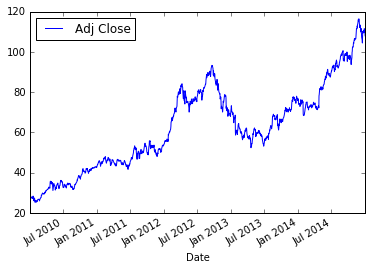

In [8]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

symbol='AAPL'  ## change this to any stock symbol you'd like to get
begin_day='01'
begin_month='00' # January (note the months run from 0 to 11)
begin_year='2010'
end_day = '31'
end_month = '11' #December
end_year='2014'
freq='d' #d - daily, w - weekly, m - monthly etc..
# the following three lines will construct a url based on the parameters above:
url = 'http://real-chart.finance.yahoo.com/table.csv?s='+symbol
url+= '&a='+begin_month+'&b='+begin_day+'&c='+begin_year
url+= '&d='+end_month+'&e='+end_day+'&f='+end_year+'&g='+freq+'&ignore=.csv'

print (url)   ## This should show a simliar stucture to the csv file found before.

# pandas allows us to read the csv file dirctly from the url
df=pd.read_csv(url)
# since all the data is read as a string, it'll be good to convert the date column to a datetime type
df['Date']=pd.to_datetime(df['Date'])
# now we can, for exmaple, plot the Adj.Close column vs. the date:
df.plot(x='Date',y='Adj Close')

### SODA API

https://dev.socrata.com/consumers/examples/pandas-and-jupyter-notebook.html

https://dev.socrata.com/docs/queries/

Now that we've talked about this, let's look at a dataset and try some things.

In [9]:
base_url_json = "https://www.opendata.go.ke/resource/p452-xb7c.json"

df_json = pd.read_json(base_url_json)
df_json.head(3)

boys_toilets costituency   county district   division  \
0             0   MSAMBWENI    KWALE    KWALE  MSAMBWENI   
1             4     KISAUNI  MOMBASA  MOMBASA    KISAUNI   
2             5      WEBUYE  BUNGOMA  BUNGOMA     CHWELE   

                                         geolocation  girls_toilets  \
0  {'latitude': '-4.248295', 'human_address': '{"...              0   
1  {'latitude': '-3.99606', 'human_address': '{"a...              4   
2  {'latitude': '0.71988', 'human_address': '{"ad...              6   

   gok_tsc_female  gok_tsc_male level_of_education      ...        \
0               0             0     PRIMARY SCHOOL      ...         
1               0             0     PRIMARY SCHOOL      ...         
2               0             1     PRIMARY SCHOOL      ...         

   school_institution_type_2  school_institution_type_3  \
0                   DAY ONLY                   ORDINARY   
1                   DAY ONLY                   ORDINARY   
2                   DAY ONLY                   ORDINARY   

        sponsor_of_school status_of_school  teachers_toilets  total_boys  \
0  CENTRAL GOVERNMENT/DEB           PUBLIC                 0           0   
1  RELIGIOUS ORGANIZATION           PUBLIC                 2           0   
2  RELIGIOUS ORGANIZATION           PUBLIC                 2           0   

   total_enrolment  total_girls total_number_of_classrooms  total_toilets  
0              839            0                          1              0  
1              736            0                         15              0  
2              624            0                         15              0  

[3 rows x 35 columns]

In [10]:
base_url_csv = "https://www.opendata.go.ke/resource/p452-xb7c.csv"

df_csv = pd.read_csv(base_url_csv)
df_csv.columns = df_csv.columns.str.replace(" ", "_").str.lower()
df_csv.head(3)

name_of_school level_of_education status_of_school  \
0            MTUMWA PRY SCH     PRIMARY SCHOOL           PUBLIC   
1  KIEMBENI BAPTIST PRI SCH     PRIMARY SCHOOL           PUBLIC   
2       MADISI ERSF PRI SCH     PRIMARY SCHOOL           PUBLIC   

        sponsor_of_school school_institution_type_1 school_institution_type_2  \
0  CENTRAL GOVERNMENT/DEB                     MIXED                  DAY ONLY   
1  RELIGIOUS ORGANIZATION                     MIXED                  DAY ONLY   
2  RELIGIOUS ORGANIZATION                     MIXED                  DAY ONLY   

  school_institution_type_3  pupil_teacher_ratio  pupil_classroom_ratio  \
0                  ORDINARY                839.0                  839.0   
1                  ORDINARY                736.0                   49.1   
2                  ORDINARY                624.0                   41.6   

   pupil_toilet_ratio     ...       non-teaching_staff_male  \
0                 0.0     ...                             0   
1                92.0     ...                             1   
2                56.7     ...                             2   

   non-teaching_staff_female  province   county  district   division  \
0                          0     COAST    KWALE     KWALE  MSAMBWENI   
1                          0     COAST  MOMBASA   MOMBASA    KISAUNI   
2                          0   WESTERN  BUNGOMA   BUNGOMA     CHWELE   

   location  costituency             geolocation  kodi_county  
0   MWERENI    MSAMBWENI  (-4.248295, 39.085658)          NaN  
1   BAMBURI      KISAUNI     (-3.99606, 39.6977)          NaN  
2    CHWELE       WEBUYE     (0.71988, 34.62895)          NaN  

[3 rows x 36 columns]

Notice that we can choose to interact with either the json or the csv file. They both give us lots of columns (and not very many rows) though and we might want to choose a smaller set of the data. We will show that we can do this using the api described in the second link

In [11]:
# First lets select subset of data
base_url_json += "?$select=boys_toilets,girls_toilets,geolocation,name_of_school,level_of_education"

df_json2 = pd.read_json(base_url_json)
df_json2.head()

boys_toilets                                        geolocation  \
0             1  {'latitude': '-1.66668', 'human_address': '{"a...   
1             3  {'latitude': '-1.012145', 'human_address': '{"...   
2             1  {'latitude': '-1.159798', 'human_address': '{"...   
3             1  {'latitude': '-0.99747', 'human_address': '{"a...   
4             0  {'latitude': '-0.42783', 'human_address': '{"a...   

   girls_toilets level_of_education        name_of_school  
0              2     PRIMARY SCHOOL      VOO SPECIAL UNIT  
1              3     PRIMARY SCHOOL        MASAANTARE PRI  
2              1     PRIMARY SCHOOL      NGOCHONI PRY SCH  
3              2     PRIMARY SCHOOL  NEEMA JUNIOR ACADEMY  
4              0     PRIMARY SCHOOL        LWANDA PRI SCH

In [12]:
# Now let's raise the number of observations
base_url_json += "&$limit=5000"

df_json3 = pd.read_json(base_url_json)

In [13]:
df_json3.head(5)

boys_toilets                                        geolocation  \
0             1  {'latitude': '-1.66668', 'human_address': '{"a...   
1             3  {'latitude': '-1.012145', 'human_address': '{"...   
2             1  {'latitude': '-1.159798', 'human_address': '{"...   
3             1  {'latitude': '-0.99747', 'human_address': '{"a...   
4             0  {'latitude': '-0.42783', 'human_address': '{"a...   

   girls_toilets level_of_education        name_of_school  
0              2     PRIMARY SCHOOL      VOO SPECIAL UNIT  
1              3     PRIMARY SCHOOL        MASAANTARE PRI  
2              1     PRIMARY SCHOOL      NGOCHONI PRY SCH  
3              2     PRIMARY SCHOOL  NEEMA JUNIOR ACADEMY  
4              0     PRIMARY SCHOOL        LWANDA PRI SCH

In [14]:
df_json.shape

(1000, 35)

In [15]:
df_json2.shape

(1000, 5)

In [16]:
df_json3.shape

(5000, 5)

In [17]:
baseurl = 'https://www.opendata.go.ke/resource/p452-xb7c.json'
baseurl += '?$select=boys_toilets,girls_toilets,geolocation,name_of_school,level_of_education'
baseurl += '&$limit=50000'

In [18]:
df_big = pd.read_json(baseurl)

In [19]:
df_big.shape

(26197, 5)

## Accessing web pages 

Requests again...  

In [20]:
url = 'http://databootcamp.nyuecon.com/'
db = requests.get(url)

In [22]:
db.headers

{'Access-Control-Allow-Origin': '*', 'Content-Encoding': 'gzip', 'Date': 'Thu, 05 May 2016 17:43:41 GMT', 'Content-Length': '3499', 'Age': '0', 'Expires': 'Thu, 05 May 2016 17:51:41 GMT', 'Last-Modified': 'Thu, 21 Apr 2016 23:57:03 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Cache-Control': 'max-age=600', 'Via': '1.1 varnish', 'Server': 'GitHub.com', 'X-Cache-Hits': '0', 'Connection': 'keep-alive', 'X-Served-By': 'cache-iad2140-IAD', 'Accept-Ranges': 'bytes', 'X-Fastly-Request-ID': 'f7fc4a2f3875a07844929a45662b486778a0fe64', 'X-GitHub-Request-Id': '17EB2E2F:645D:28EA4FF:572B85D5', 'Vary': 'Accept-Encoding', 'X-Cache': 'MISS'}

In [23]:
db.url

'http://databootcamp.nyuecon.com/'

In [24]:
db.status_code

200

In [30]:
db.content[0:500]

b'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]> <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\n<head>\n  <meta http-equiv="content-type" content="text/html; charset=utf-8">\n  <title>Data Bootcamp </title>\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="HandheldFriendly" content="True">\n<meta name="MobileOp'

## Extracting pieces of web pages 

Use Beautiful Soup...  



In [26]:
bs = BeautifulSoup(db.content, 'lxml')

print('Type and length:  ', type(bs), ', ', len(bs), sep='')
print('Title: ', bs.title)
print('First n characters:\n', bs.prettify()[0:250], sep='')

Type and length:  <class 'bs4.BeautifulSoup'>, 7
Title:  <title>Data Bootcamp </title>
First n characters:
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]> <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js"


In [27]:
bs.head

<head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<title>Data Bootcamp </title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="" name="keywords"/>
<meta content="Data Bootcamp " property="og:title"/>
<meta content="Data Bootcamp" property="og:site_name"/>
<meta content="http://databootcamp.nyuecon.com/" property="og:url"/>
<meta content="en-us" property="og:locale"/>
<meta content="website" property="og:type"/>
<link href="http://databootcamp.nyuecon.com/index.xml" rel="alternate" title="Data Bootcamp" type="application/rss+xml"/>
<link href="http://databootcamp.nyuecon.com/" rel="canonical"/>
<link href="http://databootcamp.nyuecon.com/touch-icon-144-precomposed.png" rel="apple-touch-icon-precomposed" sizes="144x144"/>
<link href="http://da

In [28]:
bs.title

<title>Data Bootcamp </title>

In [29]:
bs.find_all('a')

[<a class="baselink" href="http://databootcamp.nyuecon.com/">
   Data Bootcamp
 
 </a>,
 <a class="homelink" href="http://databootcamp.nyuecon.com/">Home</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_faq">Description &amp; FAQ</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_outline">Topic outlines &amp; links</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_duedates_ug">Due dates (UG)</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_duedates_mba">Due dates (MBA)</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_data">Data sources</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_team">Our team</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_faq">FAQ</a>,
 <a href="https://github.com/DaveBackus/Data_Bootcamp/blob/master/Documents/bootcamp_syllabus.pdf">Syllabus</a>,
 <a href="https://www.gitbook.com/book/davebackus/test/details">Book</a>,
 <a href="https://github.com/DaveBackus/Data_Bootcamp/blob/master/Documents/bootcamp_project.pdf">